# Multivariable Linear Regression 

Simple linear regression produces a model in the form:

ŷ = α + Bx

Multivariable linear regression produces a model in the form:

ŷ = α + $B_{1}x_{1}$ + $B_{2}x_{2}$ + ... + $B_{n}x_{n}$

The linear regression algorithm accomplishes this by deriving a line formula that minimizes the differences between actual values and predicted values.  This algorithm is called **ordinary least-squares**, or **OLS**.

**Scikit-learn** Python module provides a LinearRegression function for doing this job.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# For this exercise we will use a dataset of Nasdaq Apple Inc. Common Stock Historical Stock Prices
# https://www.nasdaq.com/symbol/aapl/historical
df = pd.read_csv("apple_stocks.csv")
df.head()

,date,close,volume,open,high,low
0,3/21/2018,171.27,36387880,175.04,175.09,171.2600
1,3/20/2018,175.24,19620520,175.24,176.80,174.9400
2,3/19/2018,175.30,32931110,177.32,177.47,173.6600
3,3/16/2018,178.02,38313330,178.65,179.12,177.6200
4,3/15/2018,178.65,22676520,178.50,180.24,178.0701


In [3]:
print(df['close'].var())
print(df['close'].std())

38.133755519125664
6.17525347812749


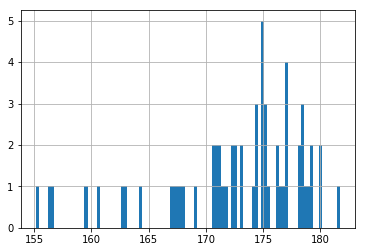

In [4]:
df['close'].hist(bins=100)

In [5]:
# Let's examine if any of these columns are highly correlated
df.corr()

,close,volume,open,high,low
close,1.000000,-0.679251,0.928700,0.966223,0.971258
volume,-0.679251,1.000000,-0.610800,-0.581887,-0.717348
open,0.928700,-0.610800,1.000000,0.972885,0.971381
high,0.966223,-0.581887,0.972885,1.000000,0.971314
low,0.971258,-0.717348,0.971381,0.971314,1.000000


In [12]:
df[['close','volume']].corr()

,close,volume
close,1.000000,-0.679251
volume,-0.679251,1.000000


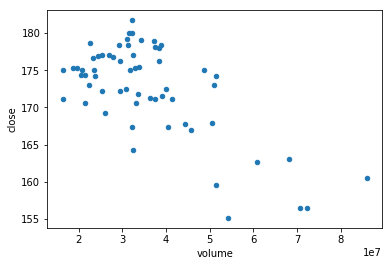

In [14]:
df.plot.scatter(x='volume',y='close')

In [15]:
# Unlike with simple linear regression where we use one predictor variable to predict one response variable,
# with multivariable regression we can use multiple predictor variables to predict one response variable.
# In this example, we will use 'open', 'high', and 'low' to predict 'close'
X = df[['open','high','low','volume']]
y = df[['close']]

In [16]:
# Split Data
# Now we can split our data into a training and test set.  In this example, we are using an 80/20 split, 
# where 80% of our data will be used for training our model, and 20% of our data will be used for testing.
    
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [17]:
# Train Model
# Now we train our LinearRegression model using the training subset of data.

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
# Now that our model is trained, we can view the coefficients of the model using regression_model.coef_, 
# which is an array of tuples of coefficients.
# Each regression coefficient shows the strength of the relationship between the predictor variable and the
# outcome variable while controlling for the other predictor variable 

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for open is -0.6391257069029136
The coefficient for high is 0.8830350045268186
The coefficient for low is 0.7194315435265527
The coefficient for volume is -1.6339724945332882e-08


In [19]:
# regression_model.intercept_ returns an array of intercepts
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 6.458722649310744


Now that we know the regression coefficients for each predictor variable and the intercept, we can figure out our model:



ŷ = 4.5 + $-0.65x_{1}$ + $0.81x_{2}$ + $0.819x_{3}$



## How good is our model - the $R^{2}$ statistic

A common method of measuring the accuracy of regression models is to use the $R^{2}$ statistic.

The $R^{2}$ statistic is defined as follows:

$R^{2}$ =  1 – (RSS/TSS)

* The RSS (Residual sum of squares) measures the variability left unexplained after performing the regression
* The TSS measues the total variance in Y
* Therefore the $R^{2}$ statistic measures proportion of variability in Y that is explained by X using our model

The scale of $R^{2}$ statistic ranges from zero to one, with zero indicating that the proposed model **does not improve prediction over the mean model and one indicating perfect prediction**. Improvement in the regression model results in proportional increases in R-squared.

In [20]:
# R^2  can be determined using our test set and the model’s score method.

regression_model.score(X_test, y_test)

# This means that in our model, 95.7% of the variability in Y can be explained using X

0.9769434899149952

In [11]:
df['close'].var()

38.133755519125664

## How good is our model - the Adjusted $R^{2}$ 

**Problems with $R^{2}$**

* **Problem 1:** Every time you add a predictor to a model, the R-squared increases, even if due to chance alone. It never decreases. Consequently, a model with more terms may appear to have a better fit simply because it has more terms.
* **Problem 2:** If a model has too many predictors and higher order polynomials, it begins to model the random noise in the data. This condition is known as overfitting the model and it produces misleadingly high R-squared values and a lessened ability to make predictions.

**Adjusted $R^{2}$ to the Rescue**
* The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. 
* The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. 
* It decreases when a predictor improves the model by less than expected by chance. 
* The adjusted R-squared can be negative, but it’s usually not.  It is always lower than the R-squared.


In [23]:
import statsmodels.formula.api as sm
lm = sm.ols(formula='close ~ open+high+low', data=df)
fit = lm.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     609.5
Date:                Thu, 21 Mar 2019   Prob (F-statistic):           2.97e-43
Time:                        13:21:25   Log-Likelihood:                -90.390
No. Observations:                  61   AIC:                             188.8
Df Residuals:                      57   BIC:                             197.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9482      5.183      0.955      0.344      -5.431      15.328
open          -0.6392      0.112     -5.696      0.000      -0.864      -0.414
high           0.8068      0.124      6.522      0.000       0.559       1.054
low            0.8030      0.101      7.981      0.000       0.602       1.005
==============================================================================
Omnibus:                       15.418   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.095
Skew:                          -0.405   Prob(JB):                     1.09e-12
Kurtosis:                       7.585   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## How good is our model - RMSE

* The RMSE is the square root of the variance of the residuals. 
* It indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values.
* Whereas $R^{2}$ is a relative measure of fit, RMSE is an absolute measure of fit. 
* As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. 
* **Lower values of RMSE indicate better fit.**
* RMSE is a good measure of how accurately the model predicts the response, and is the most important criterion for fit if the main purpose of the model is prediction.

https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

In [28]:
X_test.head()

,open,high,low,volume
40,177.30,179.44,176.82,32395870
42,178.61,179.58,177.41,31306390
2,177.32,177.47,173.66,32931110
49,174.55,175.06,173.41,21532200
51,173.44,175.37,173.05,23589930


In [25]:


# open, high, low, volume

new_values = [[300, 340, 50, 2]]
#new_values = [[177.30, 179.44, 176.82, 32395870]]
predicted_values = regression_model.predict(new_values)
predicted_values

array([[150.92448926]])

In [26]:
# We can get the mean squared error using scikit-learn’s mean_squared_error method 
# and comparing the prediction for the test data set (data not used for training) 
# with the ground truth for the data test set.

# We'll start with calculating the Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(X_test)

y_predict


array([[178.27408195],
       [178.00271859],
       [174.23957112],
       [173.88823214],
       [174.57878443],
       [162.20252227],
       [167.80638207],
       [167.33153166],
       [176.73843736],
       [173.50199293],
       [166.71732092],
       [171.20796886],
       [176.42736364]])

In [27]:
regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

0.5060861943509973

In [28]:
# And now we can calculate the Root Mean Squared Error (RMSE)
import math

math.sqrt(regression_model_mse)

0.711397353348322

In [23]:
X_test.head()

,open,high,low
40,177.30,179.44,176.82
42,178.61,179.58,177.41
2,177.32,177.47,173.66
49,174.55,175.06,173.41
51,173.44,175.37,173.05


In [24]:
# Now, let's try to make a prediction

# We can use our model to predict closing for another unknown day. 

# In the dataset, the data for 1/9/2018 is as follows:

# close: 174.33
# open: 174.55
# high: 175.06
# low: 173.41

# First, let's see if our model will predict the 'close' amount given these exact values:

new_data = [[174.55, 175.06, 173.41]]

regression_model.predict(new_data)



array([[ 173.78380068]])

In [25]:
# Now let's try to change some of the values so that the data is unknown to our model 
# (our model wasn't trained or tested on this data)

new_data = [[30.85, 28.04, 20.51]]
regression_model.predict(new_data)

array([[ 23.77396815]])